### 웹스크래핑으로 뉴스 제목 가져오기!

   웹 스크래핑(Web Scraping) : 웹에서 원하는 자료를 추출 해내는 행위로 아래의 과정을 거칩니다.
   
       
       1. request - 파이썬에서 서버에 페이지를 요청
       2. response - 서버에서 파이썬에 페이지를 보내줌 
       3. parsing - 페이지에서 원하는 데이터를 추출 

1. request - 파이썬에서 서버에 페이지를 요청
        요청을 위해 requests 패키지를 import 해주세용.

In [46]:
#! pip install requests

In [1]:
import requests

url = 'https://m.search.naver.com/search.naver?where=m_news&sm=mtb_jum&query=%EB%82%A8%EC%B0%BD%ED%9D%AC' # 뉴스 검색 페이지

    1.1 URL 요청하기 - requests.get() 함수를 사용하여 URL을 요청 후 변수 response에 저장해주세요.

In [3]:
response = requests.get(url)

2. response - 서버에서 파이썬에 페이지를 보내줌 

        2.1 status_code를 사용하여 응답코드를 출력하세요.     *(200: 정상응답)

In [5]:
print(response.status_code) 

200


    2.2 text를 사용하여 HTML 코드를 출력하세요.

<!DOCTYPE html> <html lang="ko" class=""> <head> <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"> <meta http-equiv="Content-Script-Type" content="text/javascript"> <meta name="referrer" content="always"> <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0, minimum-scale=1.0, user-scalable=yes"> <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="남창희 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'남창희'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="'남창희'의 네이버 뉴스검색 결과입니다."> <title>남창희 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118.ico"> <style type="text/css"> noscript_disp { display: none; } </style>  <noscript> <style type="text/css"> noscript_disp { display: block; } </style> </noscript><script>
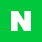
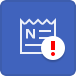

In [6]:
print(response.text)

3. parsing - 페이지에서 원하는 데이터를 추출
        Parsing을 위해 BeautifulSoup 패키지를 import 해주세요.

In [ ]:
#! pip install BeautifulSoup4

In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
html = response.text

    3.1 BeautifulSoup으로 html 파싱

In [9]:
soup = BeautifulSoup(html, 'html.parser') 

    3.2 CSS Selector로 뉴스 제목 항목 선택, 자식항목 선택 

url = 'https://m.search.naver.com/search.naver?where=m_news&sm=mtb_jum&query=%EB%82%A8%EC%B0%BD%ED%9D%AC' 페이지 접속 후 F12(개발자메뉴) 누르면 나오는 정보로 확인!

In [10]:
search_result = soup.select_one('#news_result_list') #제목 박스
news_links = search_result.select('.bx > .news_wrap > a') #자식항목

In [11]:
news_links

[<a class="news_tit" href="https://m.news.naver.com/read.nhn?mode=LSD&amp;mid=sec&amp;sid1=106&amp;oid=112&amp;aid=0003435233" onclick="return goOtherCR(this, 'a=nws*a.title&amp;r=1&amp;i=88000110_000000000000000003435233&amp;g=&amp;u='+urlencode(urlexpand(this.href)));"> <div class="api_txt_lines tit">[팝업★]"하르방 없는 집이 어딨어?"..홍진경, <b class="hl">남창희</b>만 모르는 하르방 세계관(공부왕찐천재)</div> </a>,
 <a class="news_tit" href="http://www.newsinside.kr/news/articleView.html?idxno=1109410" onclick="return goOtherCR(this, 'a=nws*b.title&amp;r=3&amp;i=880005B7_000000000000000000948365&amp;g=5095.0000948365&amp;u='+urlencode(urlexpand(this.href)));"> <div class="api_txt_lines tit">존박 "'놀면 뭐하니' 이상이, 내 노래 잘 불러..처음 <b class="hl">남창희</b>로 생각"</div> </a>,
 <a class="news_tit" href="https://m.news.naver.com/read.nhn?mode=LSD&amp;mid=sec&amp;sid1=106&amp;oid=311&amp;aid=0001299872" onclick="return goOtherCR(this, 'a=nws*a.title&amp;r=6&amp;i=880005B6_000000000000000001299872&amp;g=&amp;u='+urlencode(urlexpand(this

    3.3 뉴스 타이틀 얻기

In [12]:
len(news_links)

15

In [13]:
print(len(news_links), '건의 검색결과')
print()
for i in news_links :
    print(i.get_text())

15 건의 검색결과

 [팝업★]"하르방 없는 집이 어딨어?"..홍진경, 남창희만 모르는 하르방 세계관(공부왕찐천재) 
 존박 "'놀면 뭐하니' 이상이, 내 노래 잘 불러..처음 남창희로 생각" 
 홍진경, 수학 공부 열정…원희룡 "수학자들의 논리 능력 갖고 있다" (공부왕찐천재) [종합] 
 '미라' 윤병희 "남창희 닮았다 얘기 들어..송중기 보고 감탄" [종합] 
 남창희X윤병희, 형제라고 해도 믿을 만한 투샷 ‘똑닮았네’[SNS★컷] 
 '아침마당' 남창희 "윤정수 방송 중 화장실 行, 별명 큰일꾼" 
 ‘유퀴즈’ 남창희 “유재석, 캐릭터 잘 만들어줘 고마워” 
 박선주 "♥강레오와 별거 이유...행복한 가정" (밥심)[종합] 
 IBS 연구진, 레이저 세기 신기록 세워 
 '밥심' 남창희, 조세호 향한 숨겨진 진심은? 
 '아침마당' 남창희 "라디오 DJ 되니 비로소 연예인 된 느낌" 
 IHQ, 글로벌 OTT 겨냥 드라마 · 예능 라인업 공개 
 “갑자기 얼굴이…” 최근 유튜브에서 반응 폭발한 남창희 '노래 영상' 
 [종합] '유퀴즈' 김영희 PD "유재석 캐스팅? 별로 웃기지 않아서" 
 [SC리뷰] '데뷔 30주년' 유재석 "애정과 관심, 인생 바꿔"..감동의 미담파티('유퀴즈') 


### 코드 한번에 모아서 보기

In [16]:
search_word = input('검색어를 입력하세요:')
url = f'https://m.search.naver.com/search.naver?where=m_news&sm=mtb_jum&query={search_word}'
req = requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')
search_result = soup.select_one('#news_result_list')
news_links = search_result.select('.bx > .news_wrap > a')

print(len(news_links), '건의 검색결과')
print()
for i in news_links :
    print(i.get_text())

검색어를 입력하세요:강아지
15 건의 검색결과

 캠퍼스에 학생 반, 강아지 반…'예비 개통령' 모인 이 대학교 
 강아지분양 스타일독앤캣, 중앙일보 히트브랜드 대상 1위 수상 
 강아지분양 전문 업체 '펫제이', 말티푸 등 20% 특별 분양가 선보여 
 한예슬, ‘10살 연하’ 강아지 남친과 데이트 중?…행복 근황 공개[M+★SNS] 
 강아지 훈련시켜 줍니다, 용인시 ‘생애주기별 교육’ 
 부산 남구 수영로 142-3에서 흰색 강아지 발견 보호..방울 목줄 미용 
 심으뜸 "집에 의료가전은 처음 들이는데 와우.." 러블리한 강아지와 행복한 일상 
 오토바이에 치일 뻔한 주인 구하다 '얼굴' 잃은 영웅 강아지, 무지개다리 건넜다 
 강아지분양샵 '뷰켄넬', 24시간 상담센터로 초보 반려인들 도와 
 철저한 사후관리 시스템 적용, 강아지분양 애견샵 미유펫 
 강아지는 프라다를 입는다…60만원 명품 패딩도 척척 
 경기 안양 석수동에서 치와와 믹스 강아지 발견 보호..주인 유기 
 충남 태안 태안읍 중앙로 177에서 흰색 강아지 발견 보호 
 전남 여수 웅천동에서 흰갈색 강아지 발견 보호 
 입양 두 달만에, 같은 자리 또 버려진 강아지 [개st하우스] 


In [30]:
search_word = input('검색어를 입력하세요:')
url = f'https://m.search.naver.com/search.naver?where=view&sm=mtb_jum&query={search_word}'
req = requests.get(url)
html = req.text
soup = BeautifulSoup(html, 'html.parser')
search_result = soup.select('._svp_item')
#news_links = search_result.select('.bx > .news_wrap > a')

print(len(news_links), '건의 검색결과')
print()
for i in news_links :
    print(i.get_text())

검색어를 입력하세요:다람쥐
15 건의 검색결과

 캠퍼스에 학생 반, 강아지 반…'예비 개통령' 모인 이 대학교 
 강아지분양 스타일독앤캣, 중앙일보 히트브랜드 대상 1위 수상 
 강아지분양 전문 업체 '펫제이', 말티푸 등 20% 특별 분양가 선보여 
 한예슬, ‘10살 연하’ 강아지 남친과 데이트 중?…행복 근황 공개[M+★SNS] 
 강아지 훈련시켜 줍니다, 용인시 ‘생애주기별 교육’ 
 부산 남구 수영로 142-3에서 흰색 강아지 발견 보호..방울 목줄 미용 
 심으뜸 "집에 의료가전은 처음 들이는데 와우.." 러블리한 강아지와 행복한 일상 
 오토바이에 치일 뻔한 주인 구하다 '얼굴' 잃은 영웅 강아지, 무지개다리 건넜다 
 강아지분양샵 '뷰켄넬', 24시간 상담센터로 초보 반려인들 도와 
 철저한 사후관리 시스템 적용, 강아지분양 애견샵 미유펫 
 강아지는 프라다를 입는다…60만원 명품 패딩도 척척 
 경기 안양 석수동에서 치와와 믹스 강아지 발견 보호..주인 유기 
 충남 태안 태안읍 중앙로 177에서 흰색 강아지 발견 보호 
 전남 여수 웅천동에서 흰갈색 강아지 발견 보호 
 입양 두 달만에, 같은 자리 또 버려진 강아지 [개st하우스] 


In [17]:
pip install GoogleNews

     |████████████████████████████████| 279 kB 2.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install newspaper3k

     |████████████████████████████████| 211 kB 821 kB/s eta 0:00:01
     |████████████████████████████████| 87 kB 2.8 MB/s eta 0:00:011
     |████████████████████████████████| 7.4 MB 4.3 MB/s eta 0:00:011    |██▍                             | 542 kB 1.5 MB/s eta 0:00:05     |██████▍                         | 1.5 MB 1.5 MB/s eta 0:00:04     |█████████▌                      | 2.2 MB 1.5 MB/s eta 0:00:04     |████████████████                | 3.7 MB 16.0 MB/s eta 0:00:01     |██████████████████▎             | 4.2 MB 16.0 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 1.4 MB/s eta 0:00:01
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3355 sha256=48cc898a13fe199938cf3266ed0da23bf3918c0a1b388ef82bd6804bd31fef09
  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/b6/09/68/a9f15498ac02c23dde29f18745bc6a6f574ba4ab41861a3575
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=28cb3bc1540c

In [25]:
from GoogleNews import GoogleNews
from newspaper import Article
import pandas as pd
googlenews = GoogleNews()

In [26]:
googlenews = GoogleNews(start = '', end = '')
googlenews.set_lang('kr')
googlenews.search('앙버터')
result = googlenews.result()

result

[{'title': "[새벽을 여는 사람들]'양갱의 변신' 김태형 적당 대표",
  'media': '메트로신문',
  'date': '3 days ago',
  'datetime': datetime.datetime(2021, 5, 16, 20, 45, 6, 656786),
  'desc': '빵 대신 백설기를 이용한 앙버터도 눈길을 모았다. 김태형 적당 대표(35)는 이처럼 신선한 조합에 대해 "좋아하는 음식을 재밌게 풀어봤을 뿐"이라고 했다. 그는 ...',
  'link': 'https://www.metroseoul.co.kr/article/20210516500107',
  'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='},
 {'title': '[서울 명(소)장(인)을 찾아서-24] 오래된 여관을 개조해 만든 이색 ...',
  'media': '일요서울i',
  'date': '5 days ago',
  'datetime': datetime.datetime(2021, 5, 14, 20, 45, 6, 671050),
  'desc': '앙버터와 진한 초코 맛의 오레오 브라우니, 다쿠아즈, 티라미수, 스콘 등도 역시 잘나가는 메뉴다. 또한 독특한 병에 삼양여관 마크가 그려진 밀크티 음료와 직접 만든 ...',
  'link': 'http://www.ilyoseoul.co.kr/news/articleView.html?idxno=451479',
  'img': 'data:image/gif;base64,R0lGODlhAQABAIAAAP///////yH5BAEKAAEALAAAAAABAAEAAAICTAEAOw=='},
 {'title': "올투딜리셔스, '도제'·'도제식빵' 마켓컬리 브랜드 특가전…최대 7 ...",
  'media': '이뉴스투데이',
  'date': '2 weeks ago',
  'datetime': datetime.dateti

In [27]:
df = pd.DataFrame(result)

df

,title,media,date,datetime,desc,link,img
0,[새벽을 여는 사람들]'양갱의 변신' 김태형 적당 대표,메트로신문,3 days ago,2021-05-16 20:45:06.656786,빵 대신 백설기를 이용한 앙버터도 눈길을 모았다. 김태형 적당 대표(35)는 이처럼...,https://www.metroseoul.co.kr/article/202105165...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,[서울 명(소)장(인)을 찾아서-24] 오래된 여관을 개조해 만든 이색 ...,일요서울i,5 days ago,2021-05-14 20:45:06.671050,"앙버터와 진한 초코 맛의 오레오 브라우니, 다쿠아즈, 티라미수, 스콘 등도 역시 잘...",http://www.ilyoseoul.co.kr/news/articleView.ht...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,"올투딜리셔스, '도제'·'도제식빵' 마켓컬리 브랜드 특가전…최대 7 ...",이뉴스투데이,2 weeks ago,2021-05-05 20:45:06.757854,"이번 특가전에서는 밥부리또 5종(연어, 스테이크, 불닭, 우삼겹, 참치)과 담백한 ...",https://www.enewstoday.co.kr/news/articleView....,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,'생방송투데이-오천만의메뉴' 서울 당산동 증편토스트 떡카페 vs ...,톱스타뉴스,2 weeks ago,2021-05-05 20:45:06.771799,"... 도넛을 조명해 시청자의 침샘을 자극했다. 인절미도넛 외에는 미니도넛박스, 슈...",http://www.topstarnews.net/news/articleView.ht...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,"이혜성, 전현무 없어도 괜찮아…빵순이 찐행복 데이트 (혜성이 ...",엑스포츠뉴스,2 weeks ago,2021-05-05 20:45:06.775633,이어 앙버터빵까지 골라 집고는 자리를 잡았다. 이혜성은 처음 먹어보는 빵을 앞두고 ...,http://www.xportsnews.com/?ac=article_view&ent...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
5,"대상에프앤비, 진심을 담은 복음자리 '잼'…건강한 식문화 선도",한국경제,3 weeks ago,2021-04-28 20:45:06.788547,"바로 짜먹는 딸기잼(튜브 제형) 외 3종은 어린이도 쉽게 먹을 수 있다. 홈베이킹,...",https://www.hankyung.com/life/article/20210427...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
6,[생방송오늘저녁] 민물매운탕·돼지짜글이쌈밥&쌈채소 무한리필 ...,푸드경제 오가닉라이프신문,4 weeks ago,2021-04-21 20:45:06.795902,"TV방송정보 : 생방송투데이(2225회, 누룽지앙버터/하드라떼) 소개. ▷ 앙과 :...",http://www.iloveorganic.co.kr/news/articleView...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
7,피크닉? 홈파티? 셰프에게 맡기세요… 특급 호텔 도시락 총정리,중앙일보,1 month ago,2021-04-19 20:45:06.808375,그랜드 조선 부산의 봄맞이 투고 메뉴는 '애프터눈 티 세트'다. 조선 델리 파티시에...,https://news.joins.com/article/24036470,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
8,전남일보,전남일보,1 month ago,2021-04-19 20:45:06.837989,"이 밖에도 해남 땅끝에서 온 한입 고구마빵, 앙버터 스콘, 에그 샌드위치를 할인된 ...",https://jnilbo.com/view/media/view?code=202104...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
9,"G9, '4월의 맛' 피크닉, 캠핑용 신선식품 할인판매",라이센스뉴스,1 month ago,2021-04-19 20:45:06.872143,"이 외, △서울커피 미니 앙버터 식빵 2종 6개 세트 △반미362 비프 샌드위치 밀...",https://www.lcnews.co.kr/news/articleView.html...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
